### TL


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
# import overdose data
overdose = gpd.read_file('/home/h6x/git_projects/universal-experiment-lab/experiment_1/data/shape/mortality.gdb')

In [5]:
# drop all the columns that stats with EP
overdose = overdose.drop(overdose.filter(regex='EP').columns, axis=1)

In [6]:
overdose.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,STCNTY,geometry
0,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,01001,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
1,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,01003,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
2,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,01005,"POLYGON ((-85.74803 31.61918, -85.74543 31.618..."
3,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,01007,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
4,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,01009,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."


In [7]:
overdose.shape

(3221, 11)

In [8]:
# load Tl info data making STN as string
tl_info = pd.read_csv('/home/h6x/git_projects/universal-experiment-lab/experiment_1/outputs/census_complex_info_mortality_simplex.csv', dtype={'STCNTY': str})

In [9]:
tl_info.head(3)

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,census_count,Total_life_span_H0,Total_mid_life_span_H0
0,AL,01001,MOR_14,1,0,0,0,0,0,0,1,0,0
1,AL,01003,MOR_14,1,0,0,0,0,0,0,1,0,0
2,AL,01005,MOR_14,1,0,0,0,0,0,0,1,0,0


In [10]:
# merge overdose and tl_info

merged = tl_info.merge(overdose, left_on='STCNTY', right_on='STCNTY', how='left')

In [11]:
merged

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,...,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,geometry
0,AL,01001,MOR_14,1,0,0,0,0,0,0,...,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
1,AL,01003,MOR_14,1,0,0,0,0,0,0,...,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
2,AL,01005,MOR_14,1,0,0,0,0,0,0,...,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,"POLYGON ((-85.74803 31.61918, -85.74543 31.618..."
3,AL,01007,MOR_14,1,0,0,0,0,0,0,...,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
4,AL,01009,MOR_14,1,0,0,0,0,0,0,...,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,PR,72145,MOR_14,1,1,0,1,0,0,0,...,PR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3216,PR,72147,MOR_14,1,1,0,1,0,0,0,...,PR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3217,PR,72149,MOR_14,1,1,0,1,0,0,0,...,PR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3218,PR,72151,MOR_14,1,1,0,1,0,0,0,...,PR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [22]:
# get unique values of the Total_life_span_H0
merged['Total_life_span_H0'].unique()

array([0])

In [12]:
# print columns
merged.columns

Index(['State', 'STCNTY', 'Variable', 'Census_count', 'H0_count', 'H1_count',
       'H0_inf_count', 'H1_inf_count', 'H1_withou_inf_count',
       'H0_withou_inf_count', 'census_count', 'Total_life_span_H0',
       'Total_mid_life_span_H0', 'ST_ABB', 'PRIS_20', 'MOR_14', 'MOR_15',
       'MOR_16', 'MOR_17', 'MOR_18', 'MOR_19', 'MOR_20', 'geometry'],
      dtype='object')

In [13]:
# filter the df by STCNTY == 13001
test = merged[merged['STCNTY'] == '13001']

In [14]:
test.shape

(1, 23)

In [15]:
uniq_var = test['Variable'].unique().tolist()

In [16]:
uniq_var

['MOR_14']

In [18]:
merged.shape

(3220, 23)

In [19]:
temp = merged.copy()

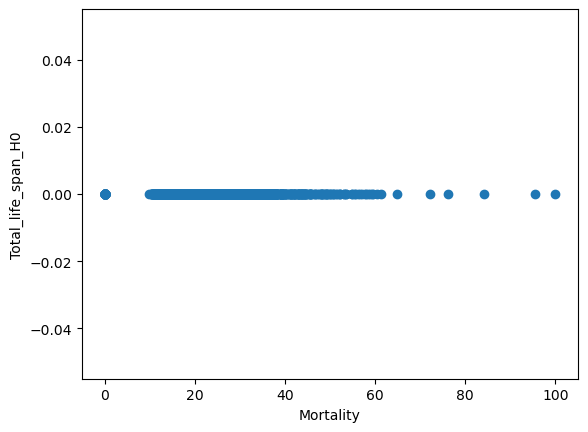

In [21]:
# plot scatter plot
plt.scatter(temp['MOR_18'], temp['Total_life_span_H0'])
plt.xlabel('Mortality')
plt.ylabel('Total_life_span_H0')
plt.show()

EP_POV150
(3142, 23)


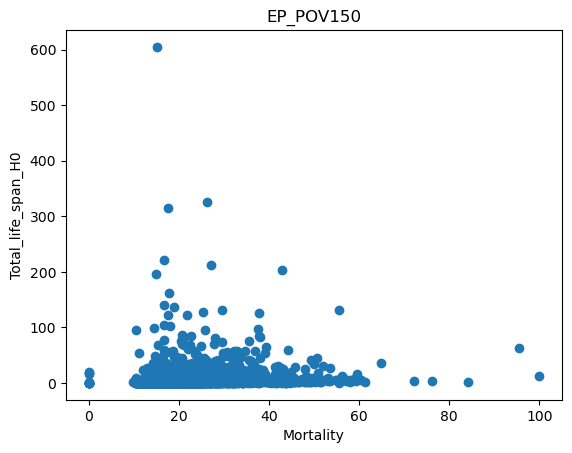

EP_UNEMP
(3142, 23)


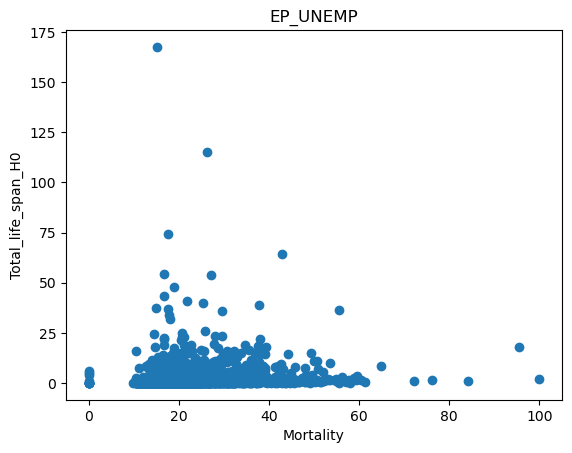

EP_NOHSDP
(3142, 23)


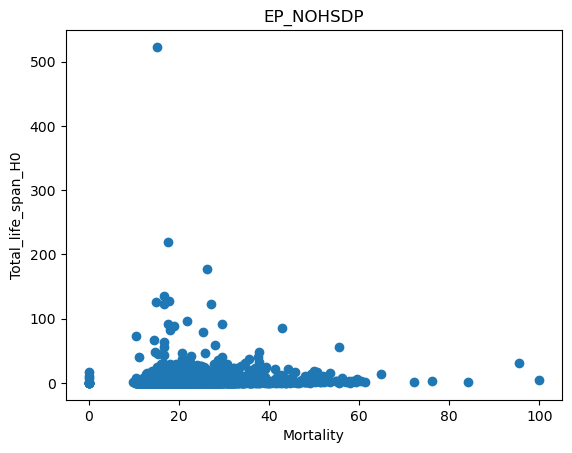

EP_UNINSUR
(3142, 23)


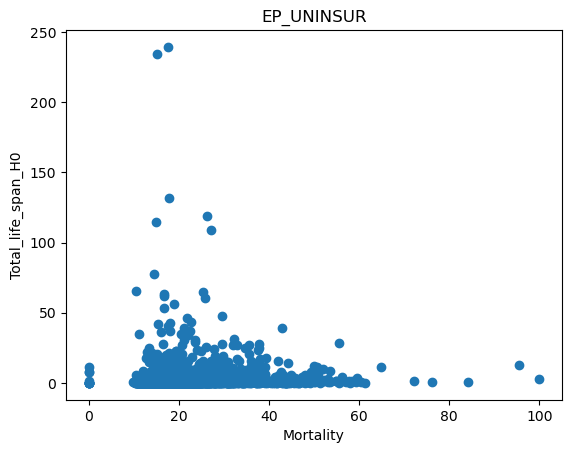

EP_AGE65
(3142, 23)


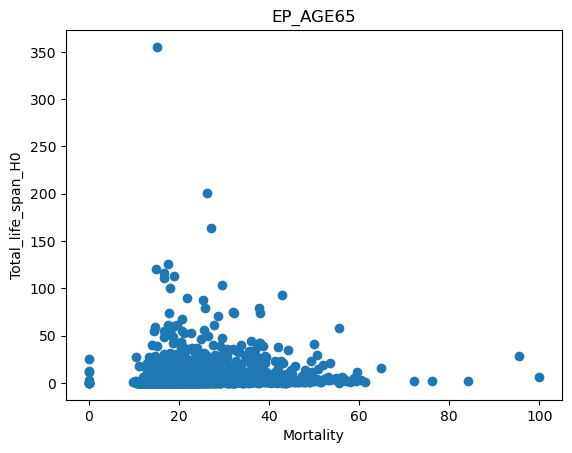

EP_AGE17
(3142, 23)


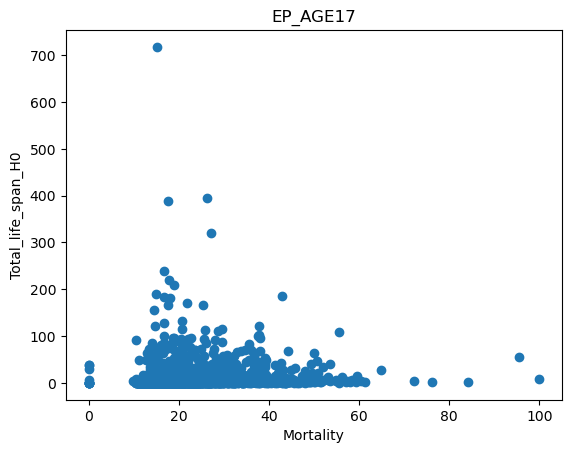

EP_DISABL
(3142, 23)


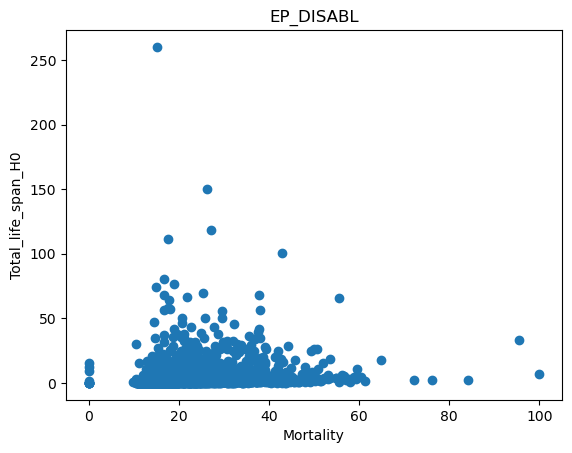

EP_SNGPNT
(3142, 23)


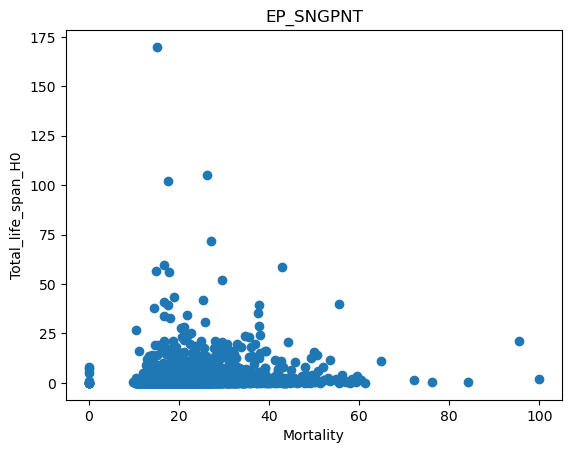

EP_LIMENG
(3142, 23)


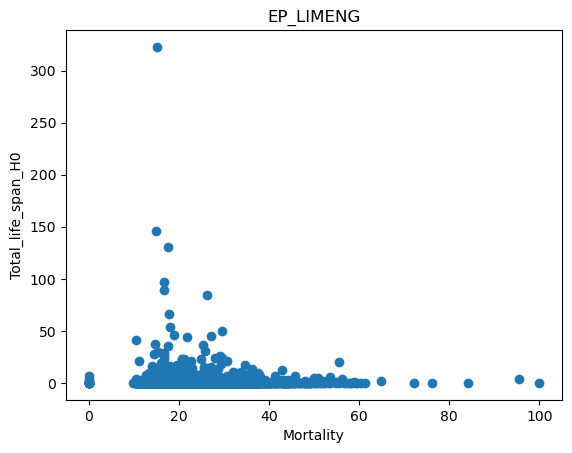

EP_MINRTY
(3142, 23)


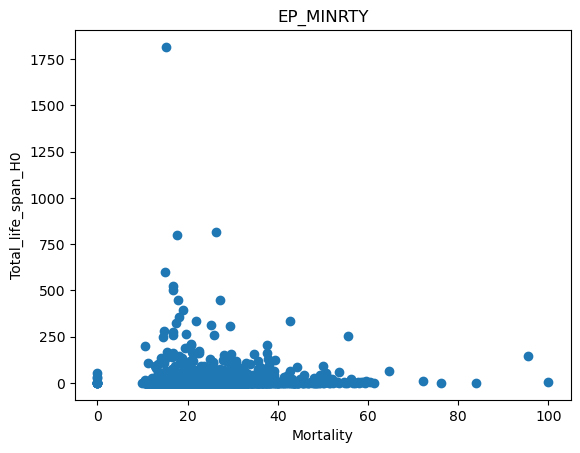

EP_MUNIT
(3142, 23)


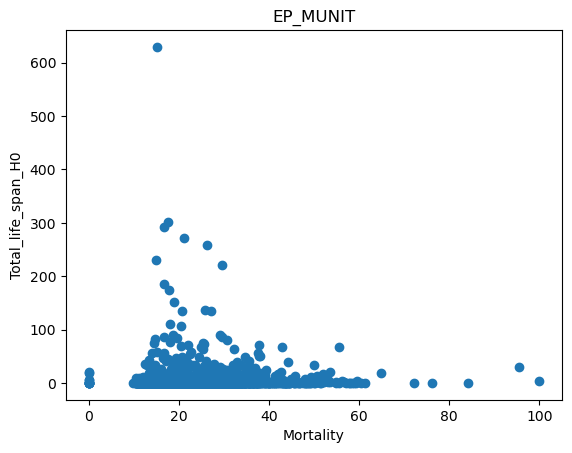

EP_MOBILE
(3142, 23)


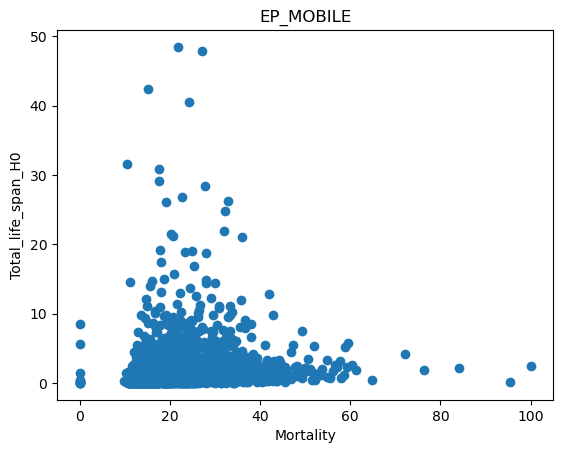

EP_CROWD
(3142, 23)


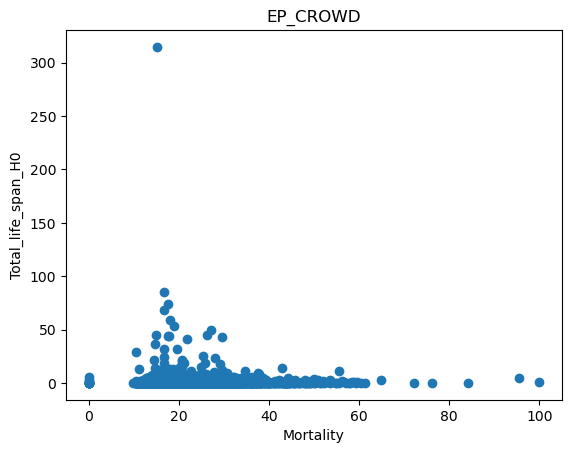

EP_NOVEH
(3142, 23)


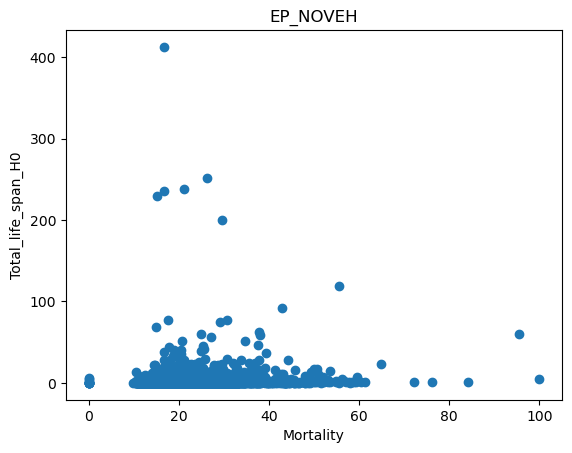

EP_GROUPQ
(3142, 23)


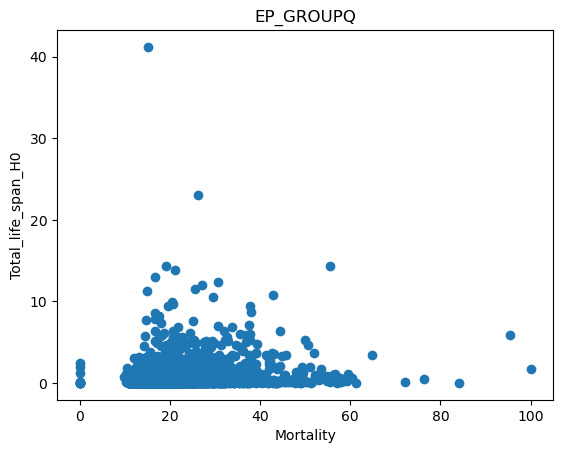

In [32]:
# LOOP THROUGH ALL THE VARIABLES

for var in uniq_var:
    print(var)
    temp = merged[merged['Variable'] == var]

    print(temp.shape)

    # plot scatter plot
    plt.scatter(temp['MOR_18'], temp['Total_life_span_H0'])
    plt.title(var)
    plt.xlabel('Mortality')
    plt.ylabel('Total_life_span_H0')
    plt.show()


    # break

EP_POV150
(3142, 23)


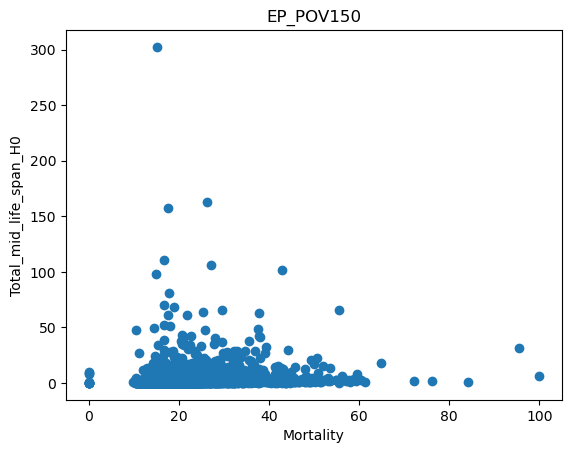

EP_UNEMP
(3142, 23)


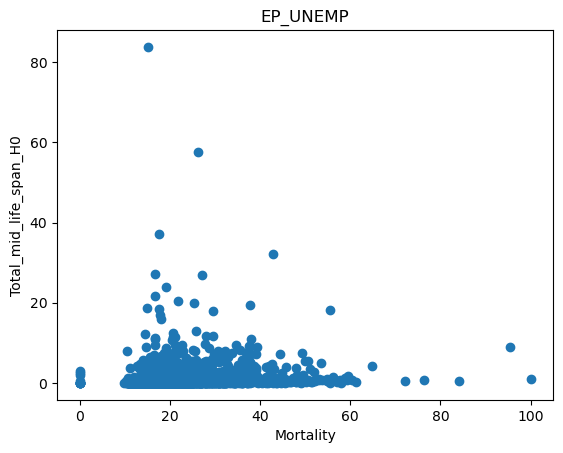

EP_NOHSDP
(3142, 23)


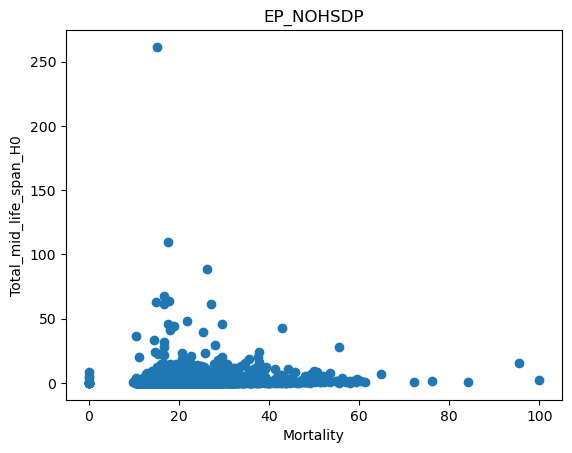

EP_UNINSUR
(3142, 23)


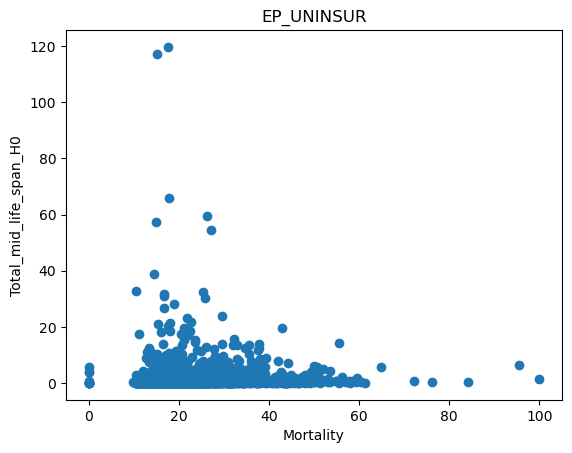

EP_AGE65
(3142, 23)


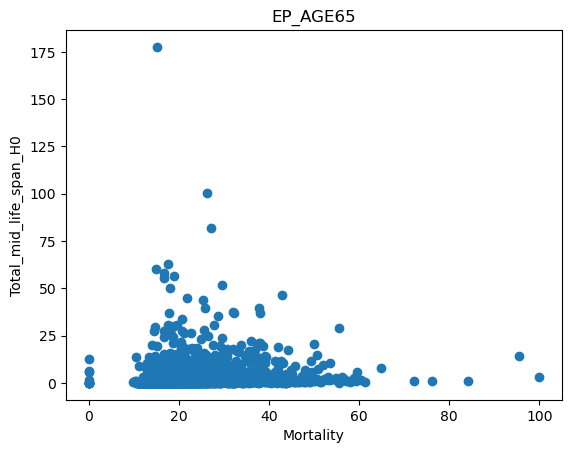

EP_AGE17
(3142, 23)


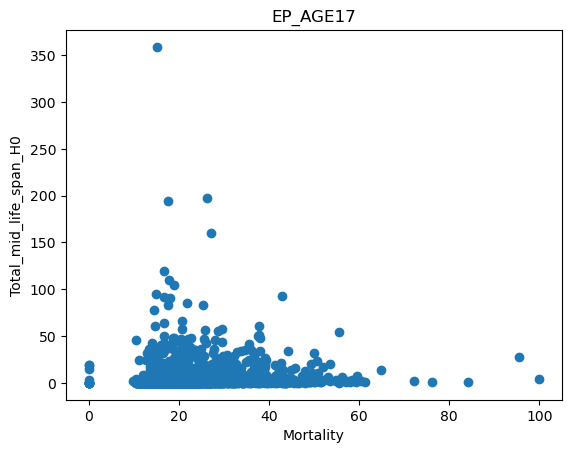

EP_DISABL
(3142, 23)


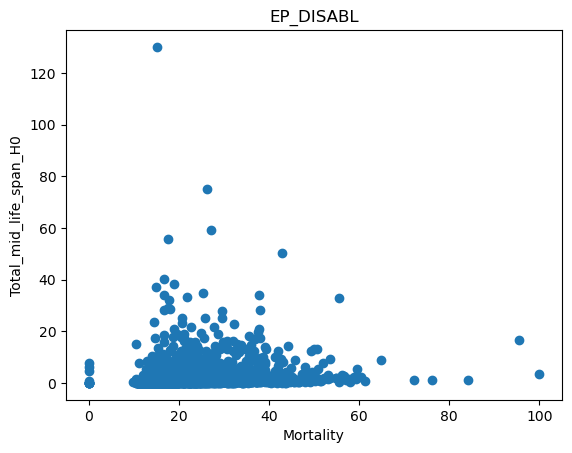

EP_SNGPNT
(3142, 23)


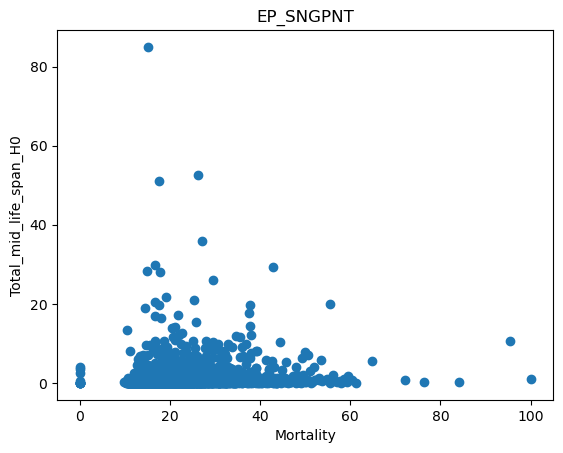

EP_LIMENG
(3142, 23)


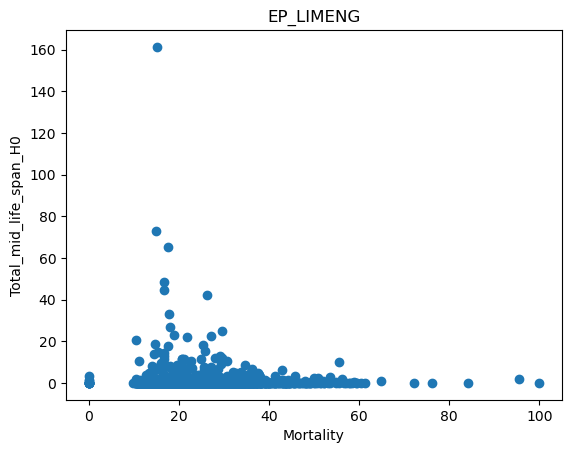

EP_MINRTY
(3142, 23)


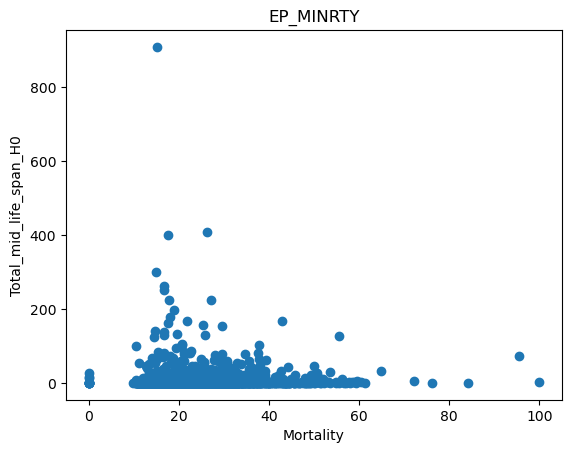

EP_MUNIT
(3142, 23)


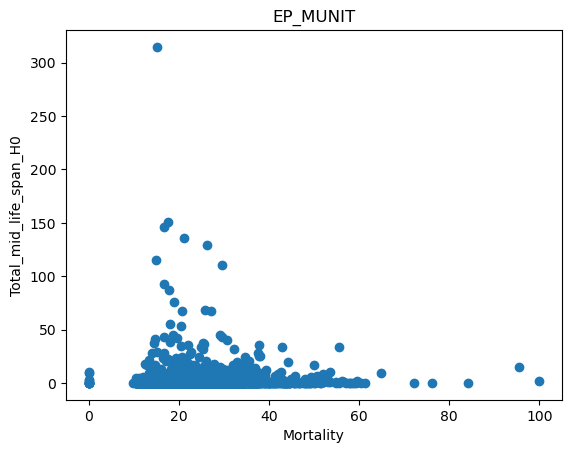

EP_MOBILE
(3142, 23)


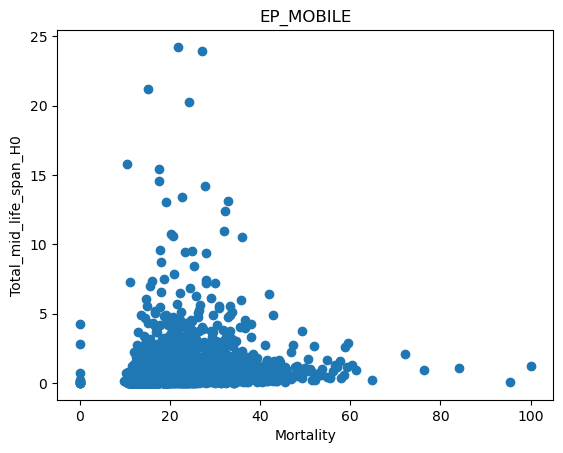

EP_CROWD
(3142, 23)


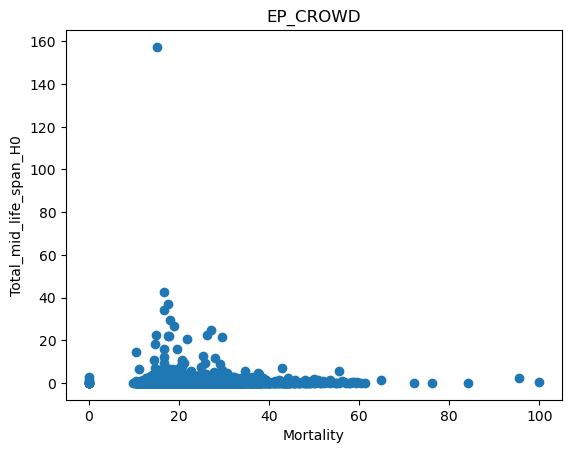

EP_NOVEH
(3142, 23)


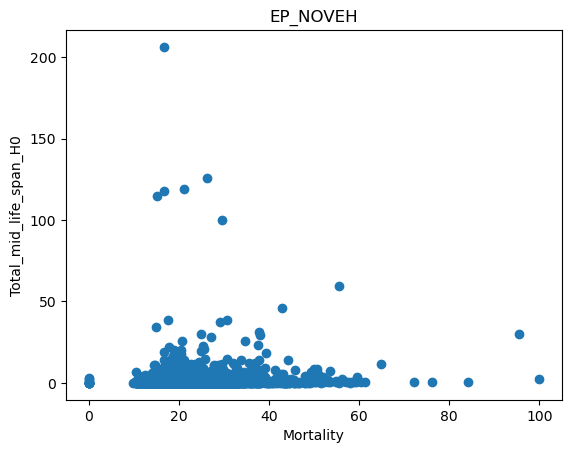

EP_GROUPQ
(3142, 23)


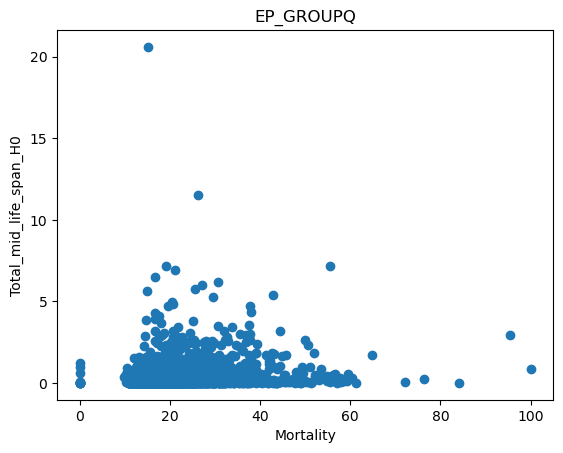

In [33]:
# LOOP THROUGH ALL THE VARIABLES

for var in uniq_var:
    print(var)
    temp = merged[merged['Variable'] == var]

    print(temp.shape)

    # plot scatter plot
    plt.scatter(temp['MOR_18'], temp['Total_mid_life_span_H0'])
    plt.title(var)
    plt.xlabel('Mortality')
    plt.ylabel('Total_mid_life_span_H0')
    plt.show()
